In [1]:
import requests
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

In [3]:
klaviyo_data = load_csv_dataset('BJ data/Campaign Revenue Minus Refunds and Cancels - Banjanan - 2024-07-03.csv')

In [27]:
klaviyo_data['Total Placed Order Value'].sum()

155578.27000000002

In [26]:
klaviyo_data[klaviyo_data['Refunded/Placed Ratio'] >= 0.25]['Total Placed Order Value'].sum()

24135.54

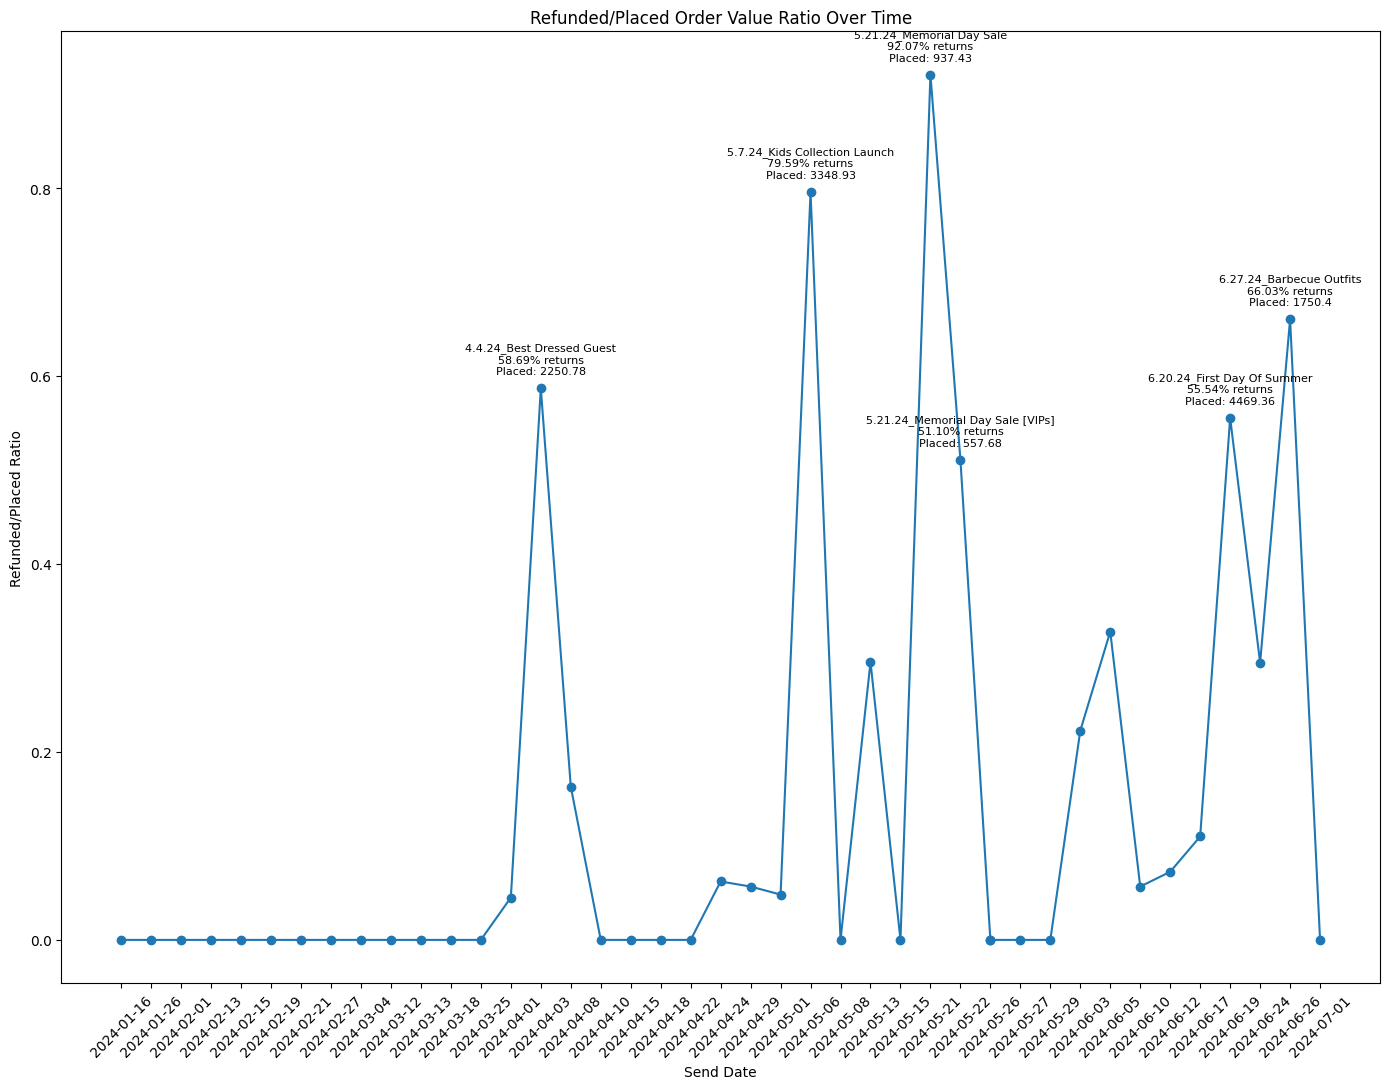

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming klaviyo_data is your DataFrame
# klaviyo_data = pd.read_csv('your_data.csv')  # Example of loading data

# Calculate the ratio
klaviyo_data['Refunded/Placed Ratio'] = klaviyo_data['Total Refunded Order Value'] / klaviyo_data['Total Placed Order Value']

# Plotting
plt.figure(figsize=(14, 11))  # Increased height from 6 to 8
plt.plot(klaviyo_data['Send Date'], klaviyo_data['Refunded/Placed Ratio'], marker='o')
plt.xlabel('Send Date')
plt.ylabel('Refunded/Placed Ratio')
plt.title('Refunded/Placed Order Value Ratio Over Time')
plt.xticks(rotation=45)
plt.gca().invert_xaxis()  # Invert the x-axis

# Annotate points where Refunded/Placed Ratio is over 0.5
for i, row in klaviyo_data.iterrows():
    if row['Refunded/Placed Ratio'] > 0.5:
        annotation_text = f"{row['Campaign Name']}\n{row['Refunded/Placed Ratio']:.2%} returns\nPlaced: {row['Total Placed Order Value']}"
        plt.annotate(annotation_text, (row['Send Date'], row['Refunded/Placed Ratio']),
                     textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.tight_layout()
plt.show()